In [1]:
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np 
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 10)
plt.rcParams.update({
    "lines.color": "black",
    "patch.edgecolor": "black",
    "text.color": "black",
    "axes.facecolor": "white",
    "axes.edgecolor": "black",
    "axes.labelcolor": "black",
    "xtick.color": "black",
    "ytick.color": "black",
    "grid.color": "gray",
    "figure.facecolor": "white",
    "figure.edgecolor": "white",
    "savefig.facecolor": "white",
    "savefig.edgecolor": "white",
    "font.size": 25})
# plt.figure(figsize=(8,6))

definitions: 

average channel capacity = 2400000

average edges capacity = 1200000 sat

average payment amount = 60000 sat

then:

a = 20

cap = 40

In [3]:
t0 = lambda a, b, p : a * b if (p == .5) else ( (a * ((1-p)**(a + b)) + (b * (p**(a + b))) - ((a + b) * ((1-p)**a) * (p**b))) / ((1 - p*2) * (((1-p)**(a + b)) - (p**(a + b)))))

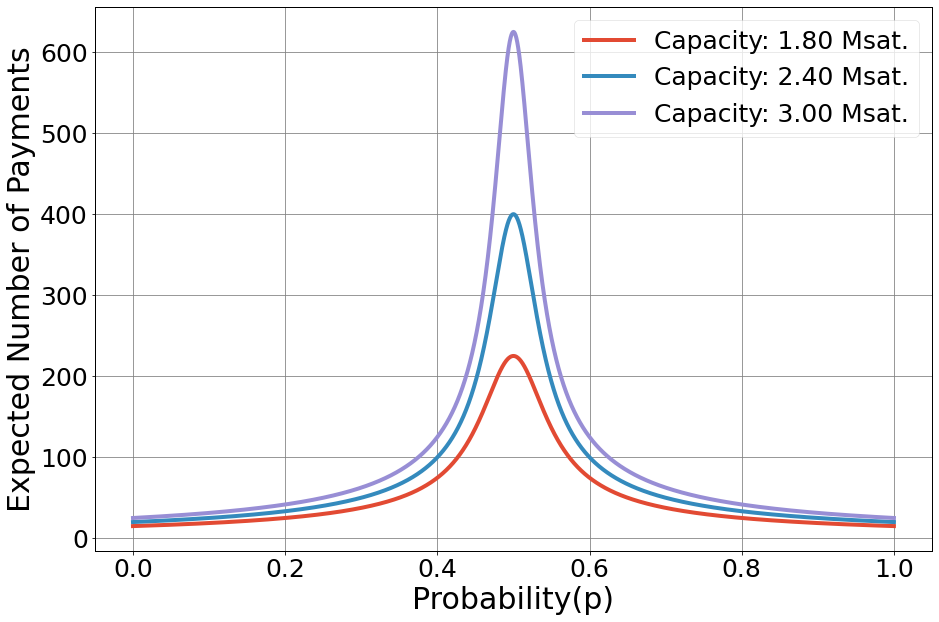

In [39]:
alpha = 1.
ppts = np.linspace(0, 1, 100000)
for cap in [30, 40, 50]:
    a = cap / (1 + (1. / alpha))
    b = a / alpha
    ax = plt.plot(ppts, [t0(a, b, p) for p in ppts], label = "Capacity: %0.2f Msat."%(cap * 0.06), linewidth = 4)



plt.legend()
# plt.title("Channel Capacity effect")
plt.xlabel("Probability(p)")
plt.ylabel("Expected Number of Payments")
plt.show()


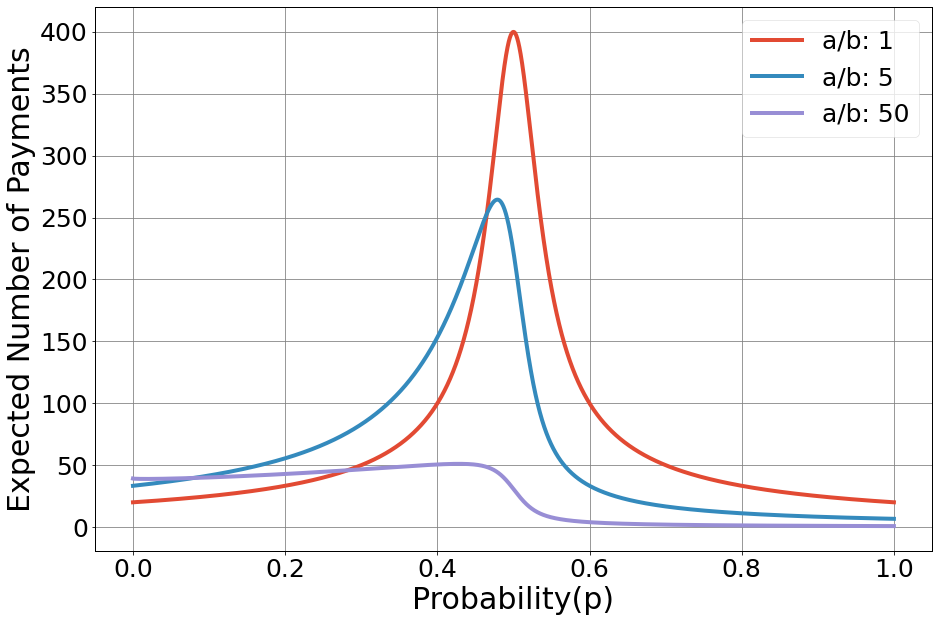

In [42]:
cap = 40
ppts = np.linspace(0, 1, 100000)
for alpha in [1, 5, 50]:
    a = cap / (1 + (1. / alpha))
    b = a / alpha
    plt.plot(ppts, [t0(a, b, p) for p in ppts], label = "a/b: %d"%alpha, linewidth = 4)



plt.legend()
# plt.title("Channel a/b effect")
plt.xlabel("Probability(p)")
plt.ylabel("Expected Number of Payments")
plt.show()

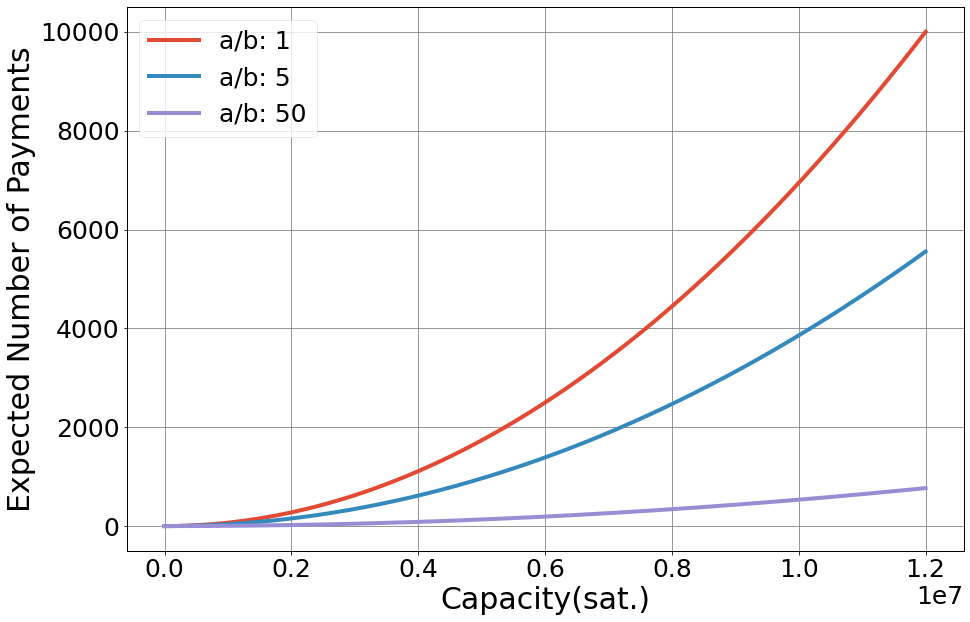

In [54]:
p = .5
cpts = np.linspace(0, 200, 100000)
for alpha in [1, 5, 50]:
    plt.plot(cpts * 60000, [t0(cap / (1 + (1. / alpha)), (cap / (1 + (1. / alpha))) / alpha, p) for cap in cpts], label = "a/b: %d"%alpha, linewidth=4)



plt.legend()
# plt.title("Channel a/b effect")
plt.xlabel("Capacity(sat.)")
plt.ylabel("Expected Number of Payments")
plt.show()

In [70]:
# alpha = 1.
# cpts = np.linspace(10, 1000, 1000)
# for p in [.5, .499, .49]:
#     plt.plot(cpts, [t0(cap / (1 + (1. / alpha)), (cap / (1 + (1. / alpha))) / alpha, p) for cap in cpts], label = "p: %f"%p)



# plt.legend()
# plt.title("Probability effect")
# plt.xlabel("Capacity")
# plt.ylabel("Expected Life Span")
# plt.show()

No handles with labels found to put in legend.


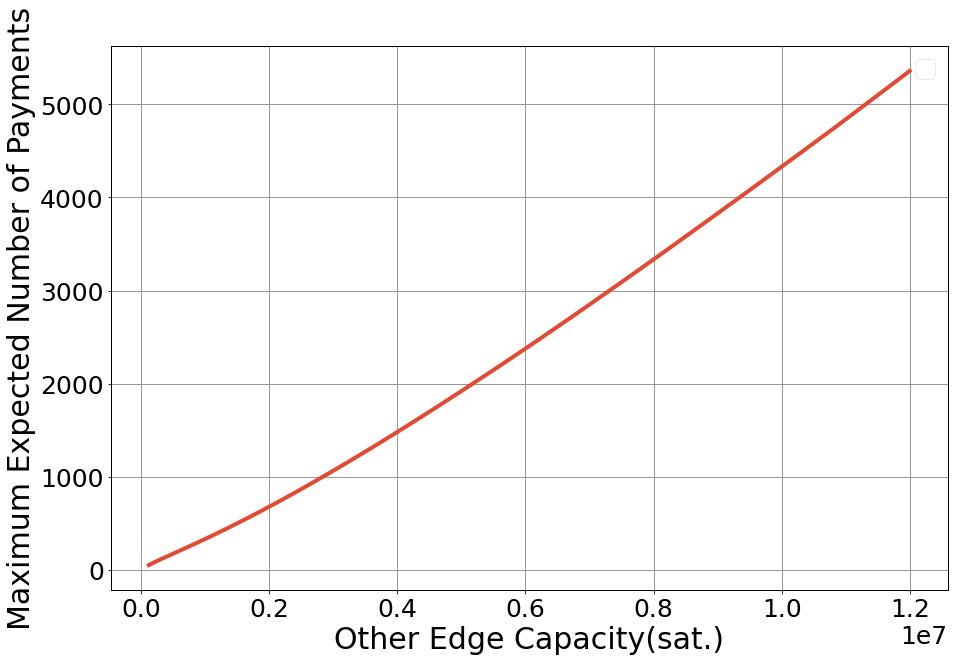

In [55]:
a = 20
ppts = np.linspace(0, 1, 1000)
maxLifeSpan = []
bList = np.linspace(a/10, 10 * a, 500)

for b in bList:
    maxLifeSpan.append(max([t0(a, b, p) for p in ppts]))

plt.plot(bList * 60000, maxLifeSpan, linewidth=4)

plt.legend()
# plt.title("A=const effect")
plt.xlabel("Other Edge Capacity(sat.)")
plt.ylabel("Maximum Expected Number of Payments")
plt.show()

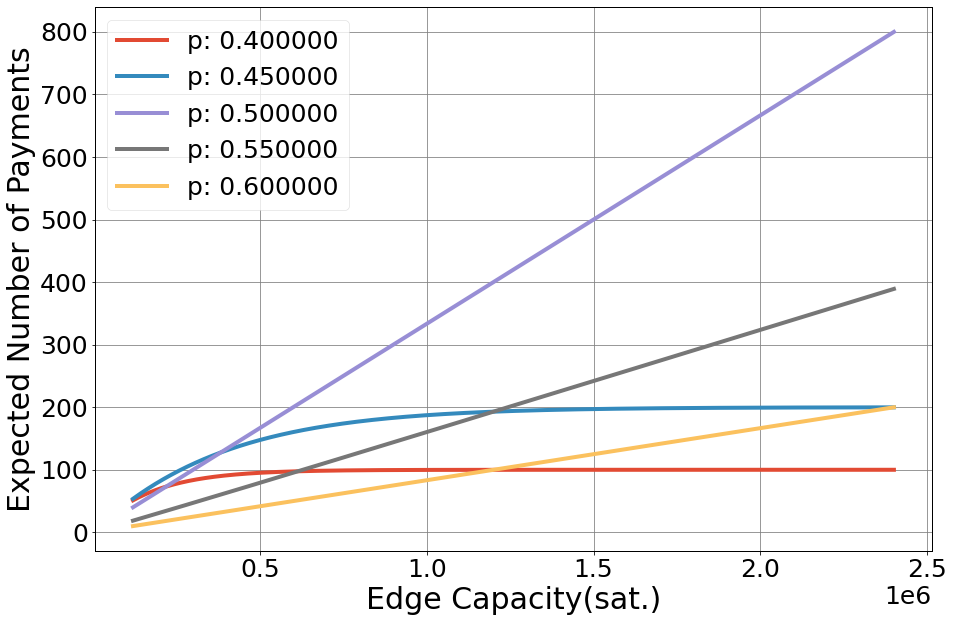

In [4]:
a = 20

bList = np.linspace(a / 10, 2 * a, 1000)
for p in [.4, .45, .5, .55, .6]:
    plt.plot(bList * 60000, [t0(a, b, p) for b in bList], label = "p: %f"%p, linewidth = 4)



plt.legend()
# plt.title("Channel a/b effect")
plt.xlabel("Edge Capacity(sat.)")
plt.ylabel("Expected Number of Payments")
plt.show()